In [1]:
import pandas as pd
import numpy as np
import datetime
import geopandas as gpd
import difflib
import country_converter as coco
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

In [2]:
dt =  datetime.datetime.today()-datetime.timedelta(days=1)

data_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+dt.strftime("%m-%d-%Y.csv")

df=pd.read_csv(data_link)
df.rename(columns = {'Country_Region':'iso_a3'}, inplace = True) 

In [3]:
g=df.groupby("iso_a3")

In [4]:
f=g['Confirmed'].sum()

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [6]:
standard_names = coco.convert(names=list(f.index), to='ISO3')

In [7]:
m=f.reset_index()
m["iso_a3"]=standard_names
m

,iso_a3,Confirmed
0,AFG,840
1,ALB,518
2,DZA,2268
3,AND,673
4,AGO,19
...,...,...
180,PSE,374
181,ESH,6
182,YEM,1
183,ZMB,48


In [8]:
world=world.merge(m, on='iso_a3')
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Confirmed
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",17
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",94
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",6
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",30809
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",667801


In [9]:
world["cp"]=world["Confirmed"]/world["pop_est"]

In [10]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(.24, 1, N)
vals[:, 1] = np.linspace(.24, 0, N)
vals[:, 2] = np.linspace(.24, 0, N)
cmp = ListedColormap(vals)

In [11]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Confirmed,cp
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",17,0.000018
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",94,0.000002
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",6,0.000010
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",30809,0.000865
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",667801,0.002045


In [12]:
vmin=world['cp'].min()
vmax=world['cp'].max()

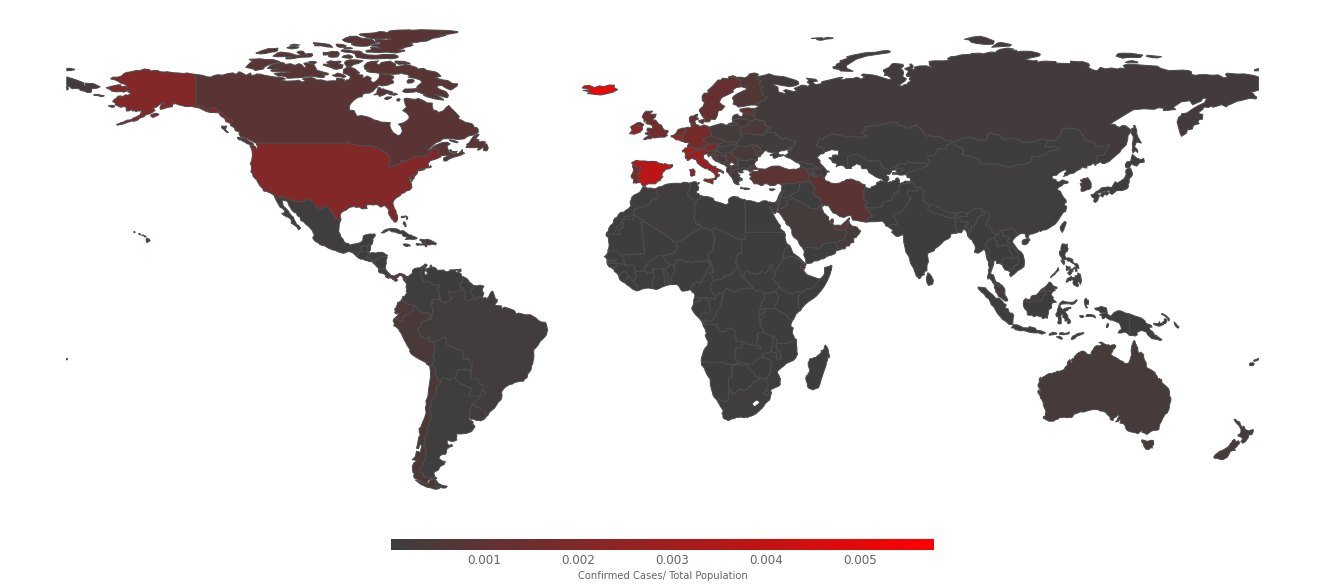

In [13]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
plt.rcParams['savefig.facecolor'] = '#3D3D3D'
sm = plt.cm.ScalarMappable(cmap=cmp, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cb=fig.colorbar(sm, orientation="horizontal", fraction=0.02, pad=0.05, aspect = 50)
cb.outline.set_visible(False)
cb.ax.tick_params(size=0)
cb.ax.set_xlabel('Confirmed Cases/ Total Population', color='0.4')

plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color='0.4',size='large')

world.plot(column='cp', cmap=cmp, linewidth=1, ax=ax, edgecolor='0.3')
plt.savefig('../website/world.png',dpi=200,bbox_inches='tight')